In [117]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from IPython.display import Image
from six import StringIO
import pydot

In [118]:
seed = 42
np.random.seed(seed)

## Gerandos duas classes que se sobrepõem.

In [119]:
# Number of examples.
N = 1000
centers = [[-2, -0.5], [0.5, 0.5]]

# Create a 2-class dataset for classification.
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

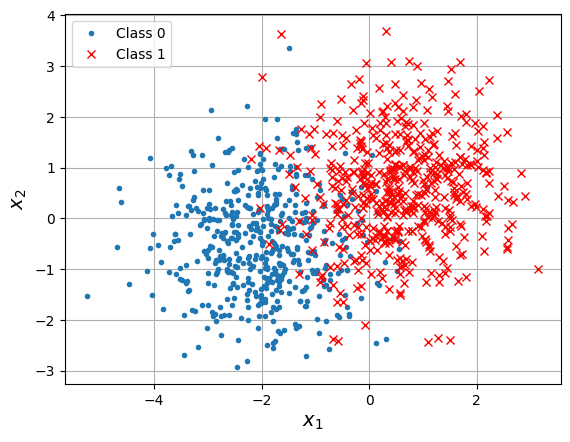

In [120]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig('knn_for_two_classes.png', dpi=600)
plt.show()

#### Qual seria o formato mais simples para a fronteira de separação?

In [121]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Decision Tree

In [122]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='entropy', random_state=seed)

# Fit the classifier on the training features and labels.
clf.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(X_train)

# Calculate and return the accuracy on the test data
train_acc = accuracy_score(y_train, y_pred)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(X_test)

# Calculate and return the accuracy on the test data
test_acc = accuracy_score(y_test, y_pred)

print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  1.0
Test accuracy:  0.895


#### Observações

+ Sem nenhuma restrição, as árvores de decisão têm uma capacidade (flexibilidade) muito alta, que faz com que elas se sobreajustem facilmente.


+ Elas crescem até que todas as folhas tenham entropia igual a 0 ou não existam mais atributos a ser utilizados.

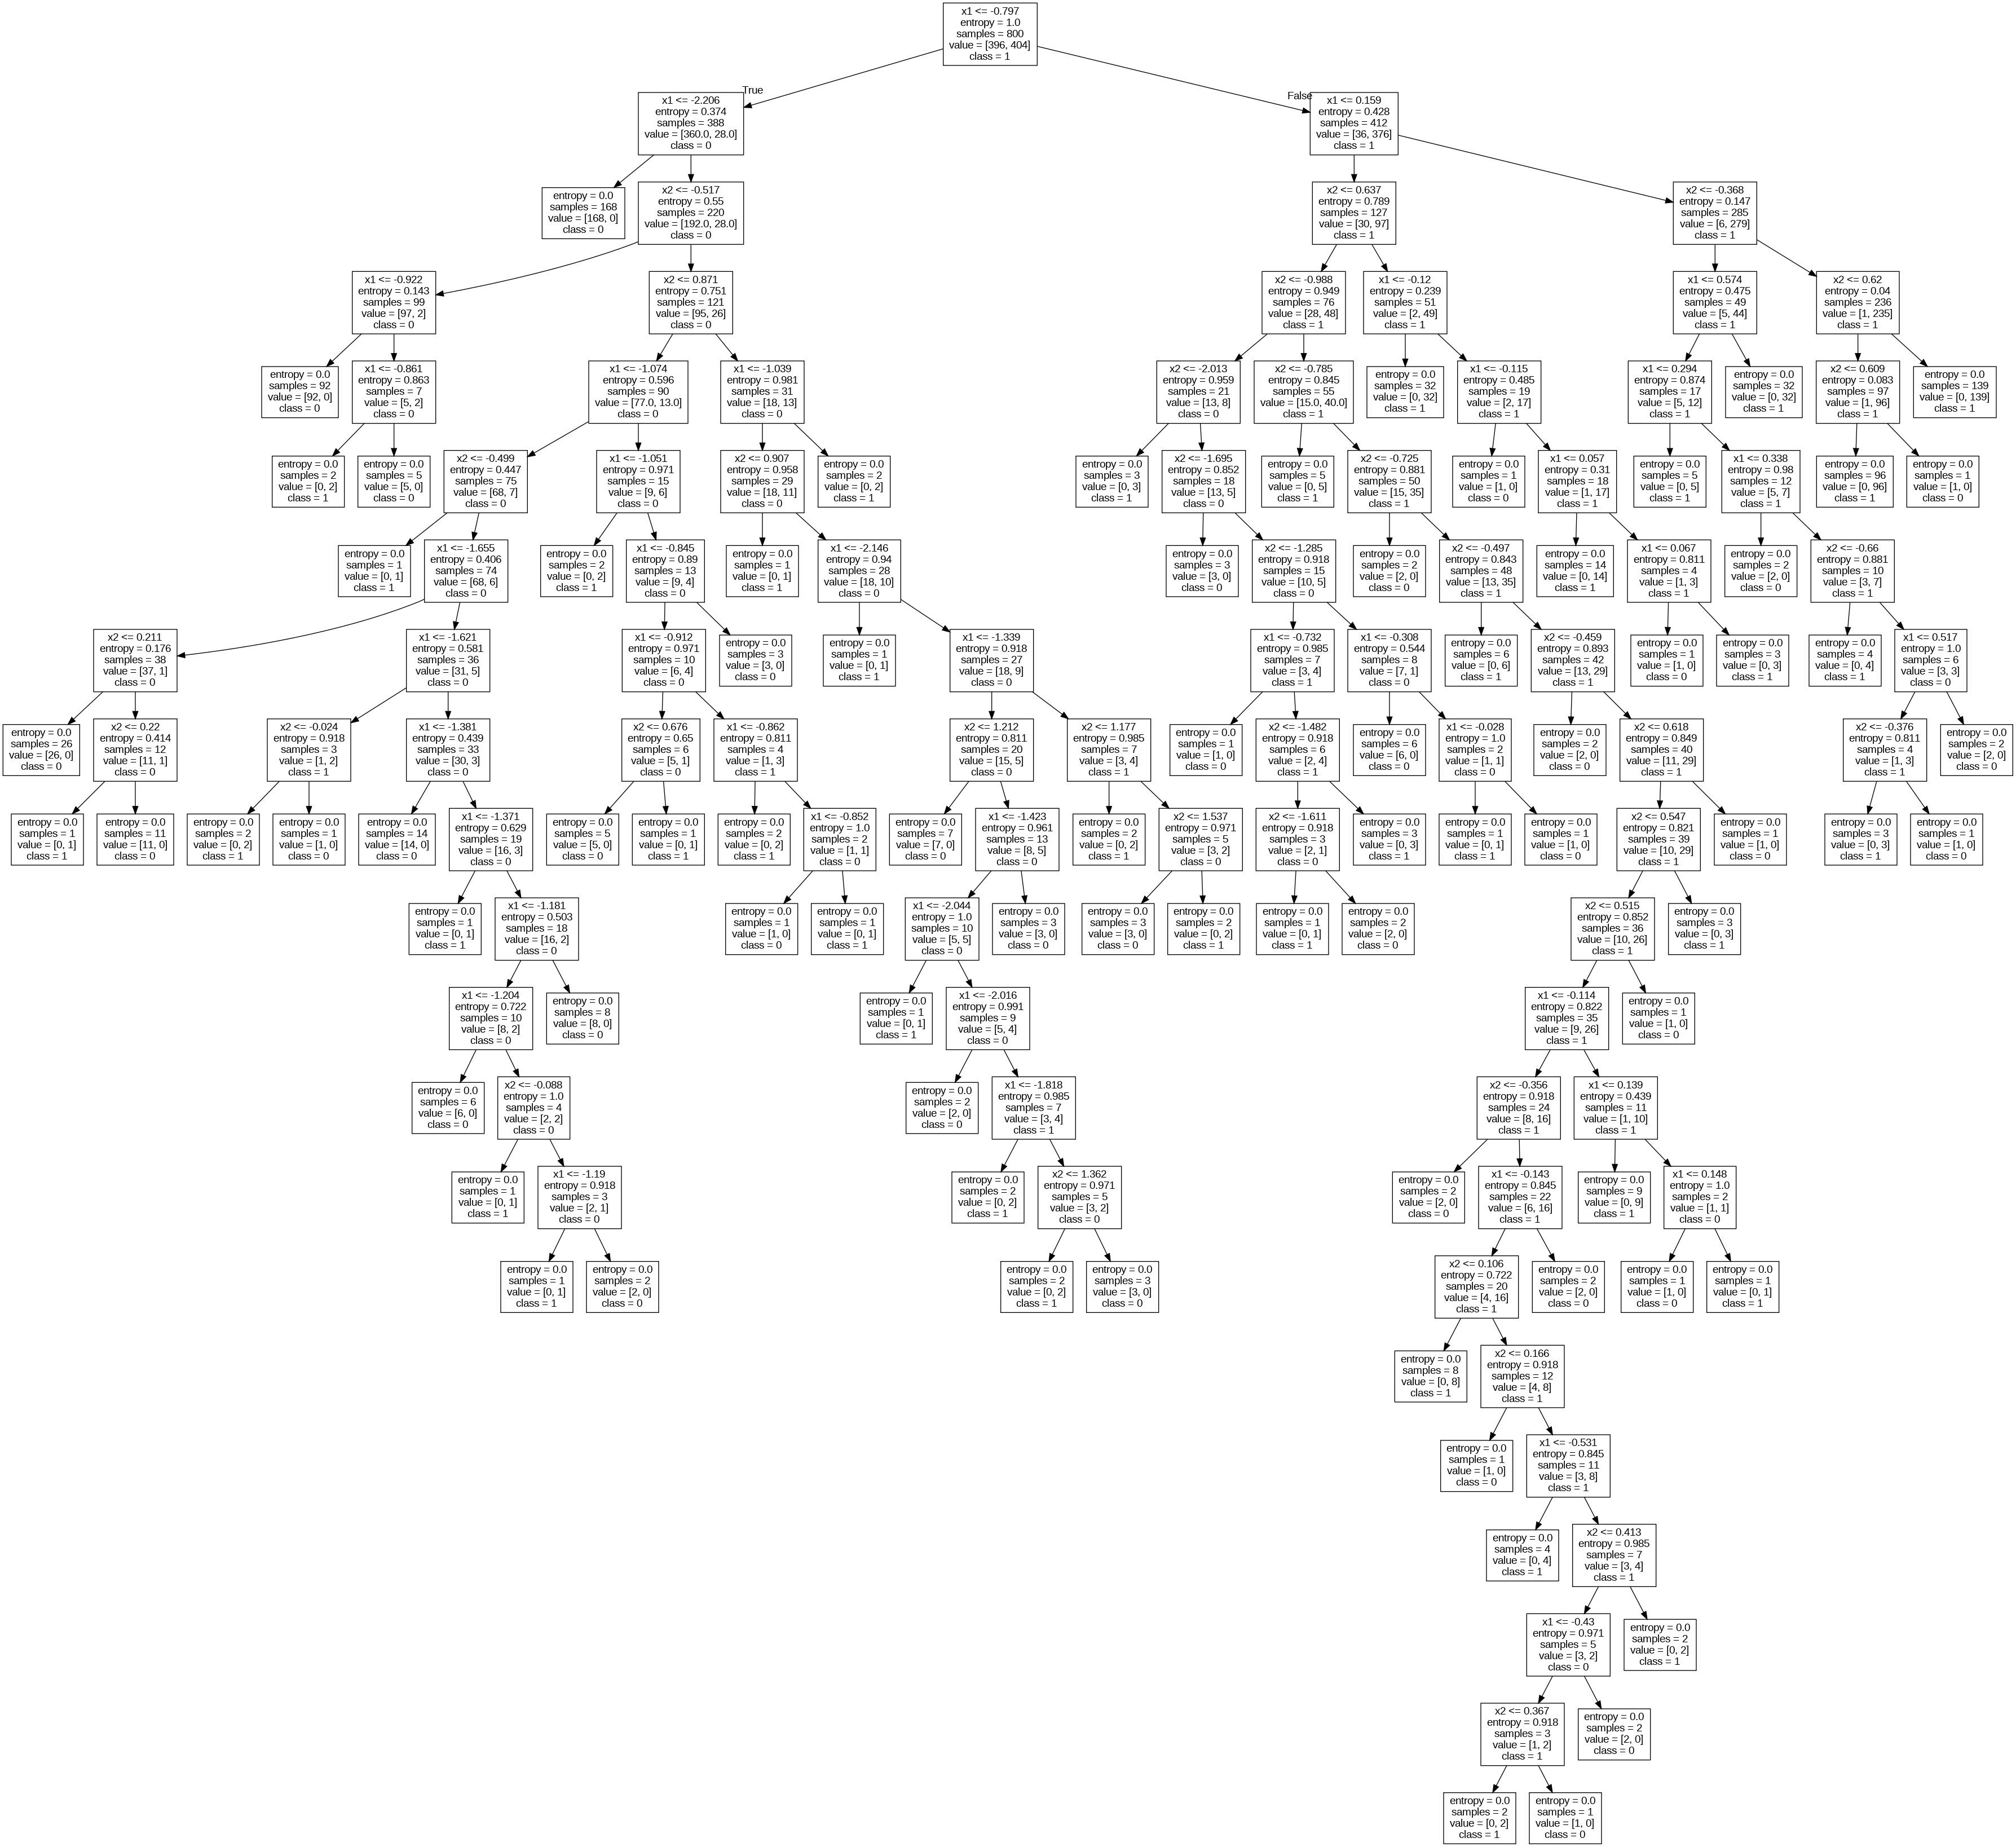

In [123]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

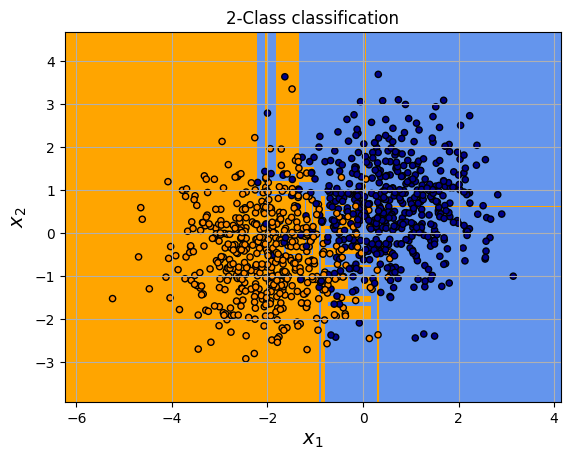

In [124]:
# Step size in the mesh.
h = .02

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")
plt.grid()

#plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

#### A superfície de separação é altamente complexa, se sobreajustando aos dados de treinamento.

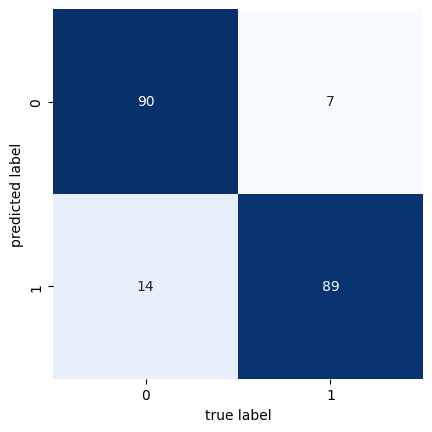

In [125]:
# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('confusion_matrix_dt.png', dpi=600)
plt.show()

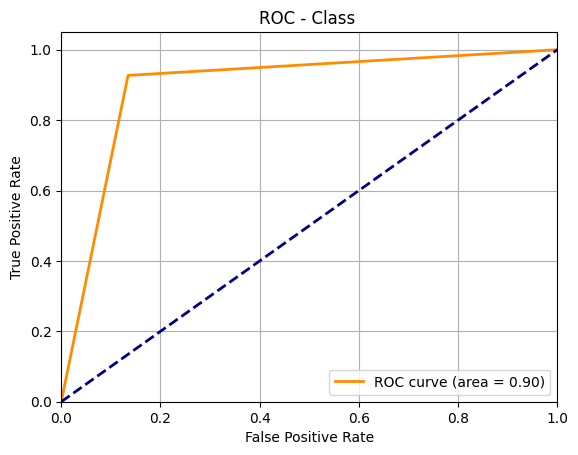

In [126]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class.
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.grid()

#plt.savefig('roc_dt.png', dpi=600)
plt.show()

In [127]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       104
           1       0.86      0.93      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



## Logistic Regression

In [128]:
# Instantiate LogisticRegression object.
clf = LogisticRegression(random_state=seed)

# Train model.
clf.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(X_train)

# Calculate and return the accuracy on the test data
train_acc = accuracy_score(y_train, y_pred)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(X_test)

# Calculate and return the accuracy on the test data
test_acc = accuracy_score(y_test, y_pred)

print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.92375
Test accuracy:  0.91


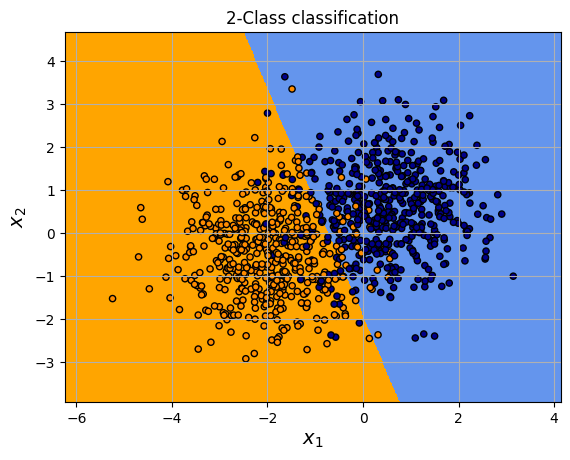

In [129]:
# Step size in the mesh.
h = .02

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")
plt.grid()

#plt.savefig('decision_boundary_lr.png', dpi=600)
plt.show()

#### Fronteira de decisão mais simples, resultando em maior capacidade de generalização.

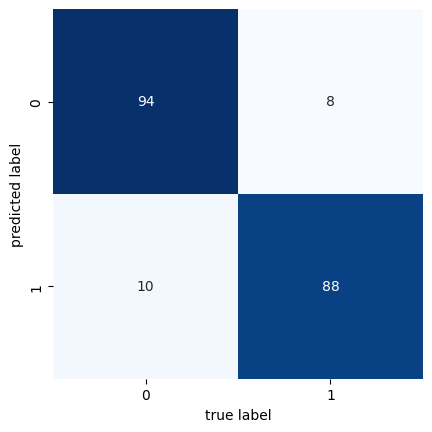

In [130]:
# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('confusion_matrix_lr.png', dpi=600)
plt.show()

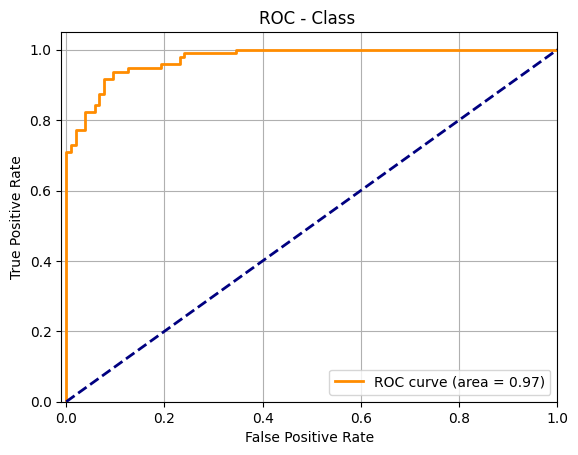

In [131]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class.
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.grid()

#plt.savefig('roc_dt.png', dpi=600)
plt.show()

In [132]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       104
           1       0.90      0.92      0.91        96

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



## Evitando o sobreajuste.


Podemos evitar o sobreajuste definindo os seguintes hiperparâmetros:


+ **max_depth**: profundidade máxima da rede.


+ **min_samples_leaf**: número mínimo de amostras necessárias em um **nó folha**, ou seja, não podem haver **nós folhas** com número de amostras menor do que `min_samples_leaf`.
    + Um ponto de ramificação em qualquer profundidade só será considerado se deixar pelo menos `min_samples_leaf` em cada um dos ramos esquerdo e direito.


**Como encontramos os melhores valores para estes hiperparâmetros? Usar ferramentas de otimização: grid search, random search, otimização Bayesiana (e.g., optuna)**

In [133]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=11, random_state=seed)

# Fit the classifier on the training features and labels.
clf.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(X_test)

# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ', accuracy)

accuracy:  0.91


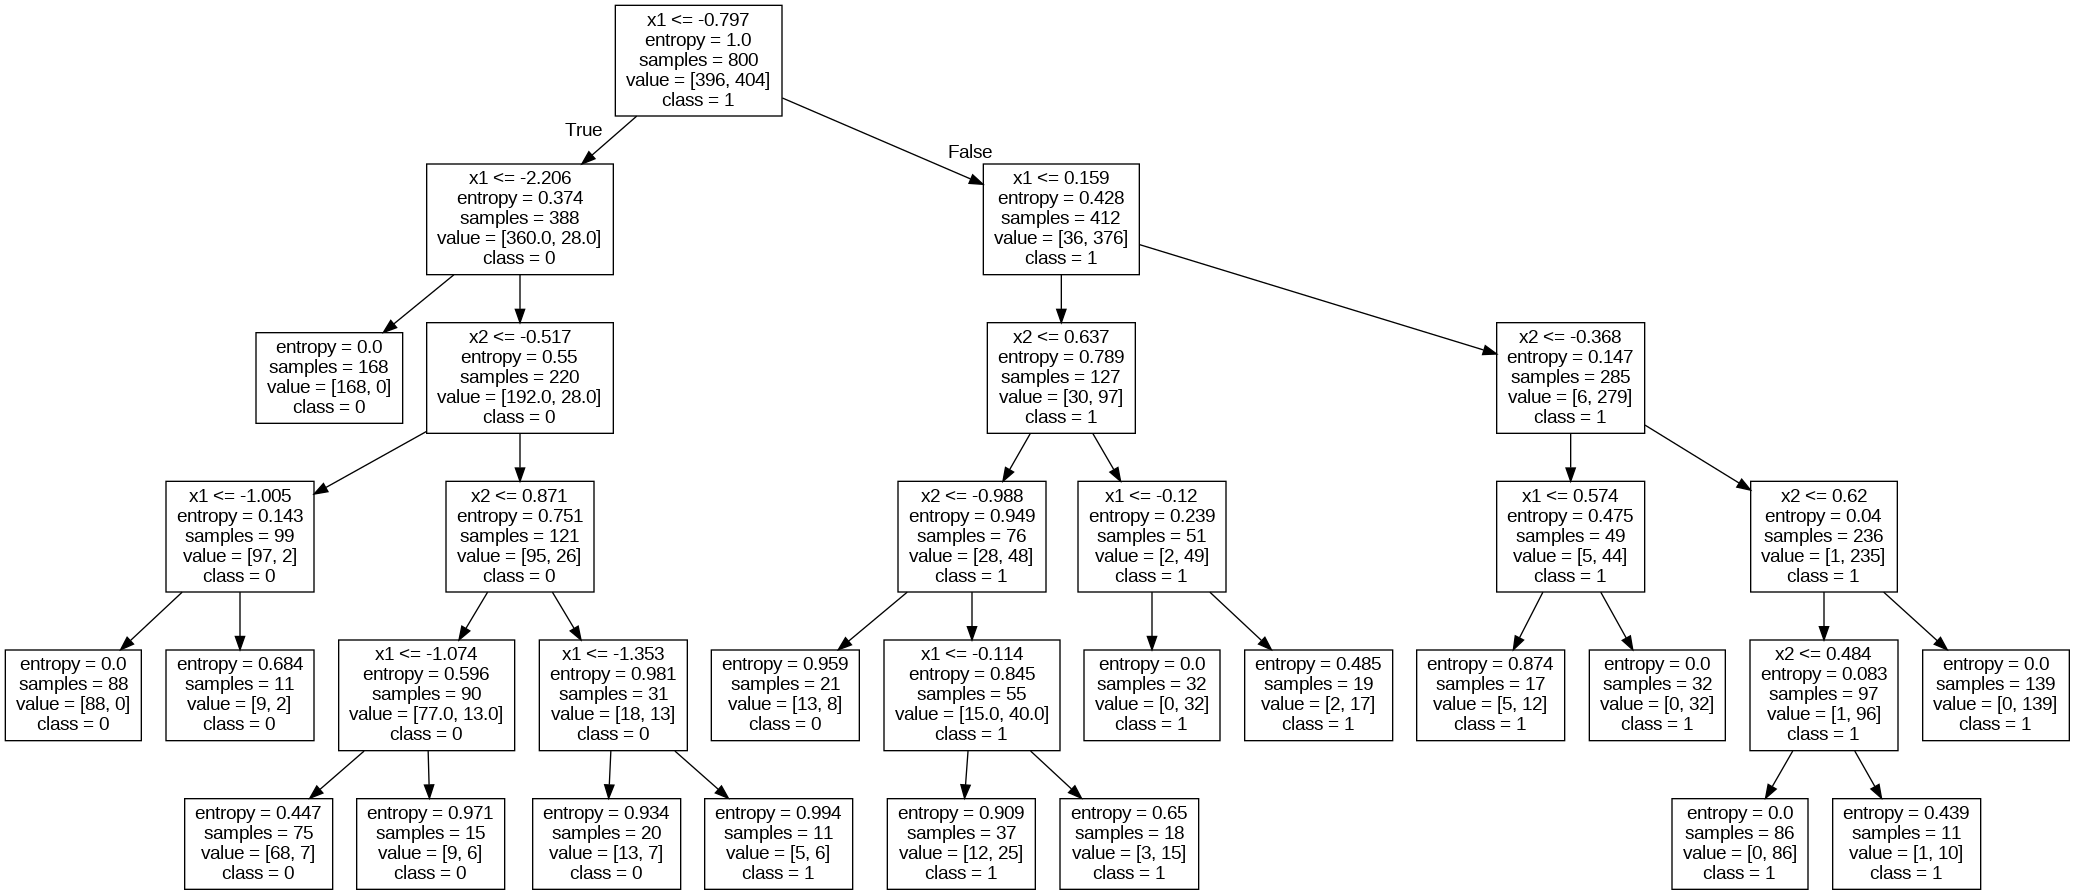

In [134]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

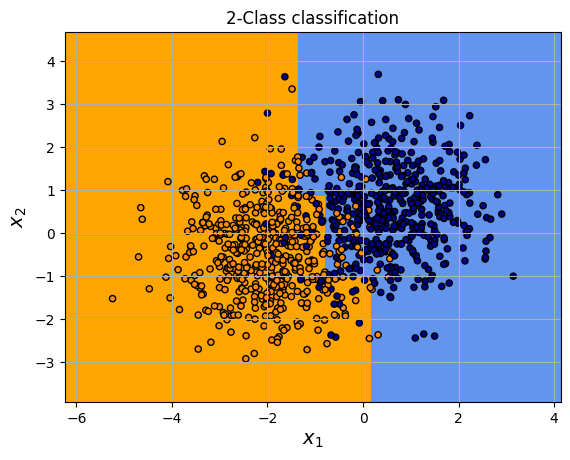

In [135]:
# Step size in the mesh.
h = .02

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")
plt.grid()

#plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

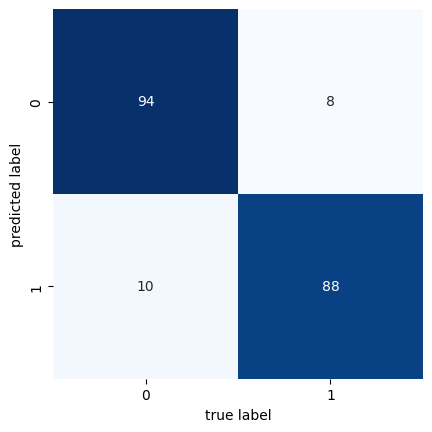

In [136]:
# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('confusion_matrix_lr.png', dpi=600)
plt.show()

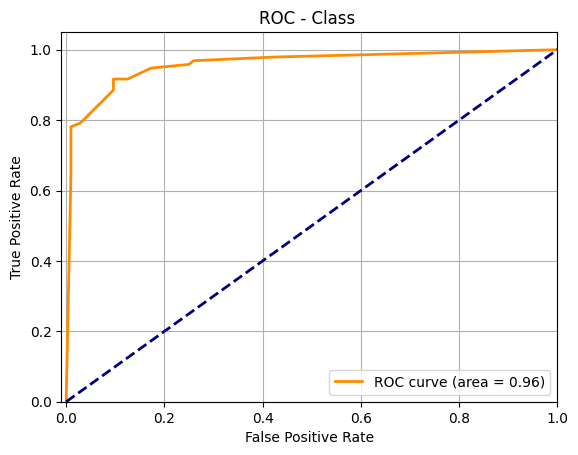

In [137]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class.
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.grid()

plt.show()

In [138]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       104
           1       0.90      0.92      0.91        96

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

